# Wrangling & Analyzing Data from the WeRateDogs Twitter Account

## Introduction

In this project, I will be gathering data from the rather eccentric dog-rating system found on the WeRateDogs Twitter account, assessing and cleaning this data, and then analyzing and creating a visual for any insights found.


## Gathering

Data will be gathered from 3 sources: a prepared dataframe of 5000 tweets I have on hand, used with permission from the account, another dataframe of predictions of each dog breed of all tweet images run through a neural network, and additional data from twitter that will need to be gathered through the Twitter API.

### File on hand
First I will read in the archive of the tweets.

In [367]:
# import libraries and read in the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

arc = pd.read_csv('twitter-archive-enhanced.csv')  # arc will stand for the archive of all the tweets
arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Image Predictions

This file is on the Udacity servers on will need to be downloaded programatically using the Requests library

In [368]:
#import libraries
import requests
import os

In [369]:
#input url to which the request will be made
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response  # if response returns 200, the request was successful

<Response [200]>

In [370]:
# write the content of the response variable to a file
with open(os.path.join('predictions', 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [371]:
# read in the file
preds = pd.read_csv('predictions/image-predictions.tsv', sep='\t')  # preds will stand for predictions
preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Additional Twitter Data

In order to get information on the amount of retweets and favorites for each tweet, I must access the Twitter API through the Tweepy library.

In [372]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = arc.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

2356

In [373]:
# Check for tweet_json.txt
# if tweet_json.txt doesn't exist, download programatically
url = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
json_txt_file_path = 'tweet-json.txt'
if not os.path.isfile(json_txt_file_path):
    with open(json_txt_file_path, mode = 'wb') as file:
        file.write(requests.get(url).content)
# Load into DataFrame
json_df = pd.read_json(json_txt_file_path, lines=True)

In [374]:
# extract columns that pertain to like and favorite counts
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
likes = json_df[columns_of_interest]  # likes will stand for the data on favorites and retweets
likes.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing

Now that the data has been imported, it's time to assess it's quality and tidiness to look for issues to clean. A list of issues to clean will be kept at th bottom of this section



In [375]:
# Do a quick visual assesment
arc.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Banditt. He is a brown LaBeouf retriever. Loves cold weather. 4 smaller dogs are his sons (probably). 10/10 https://t.co/Ko7eCsFpnI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086256599040/photo/1,10,10,Banditt,None,None,None,None
1941,673715861853720576,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861853720576/photo/1,4,10,a,None,None,None,None
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup,NaN,NaN,NaN,NaN,12,10,None,None,None,pupper,None
1670,682406705142087680,NaN,NaN,2015-12-31 03:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Patrick. He's a bigass pupper. 7/10 https://t.co/J9DXBFoAQe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682406705142087680/photo/1,7,10,Patrick,None,None,pupper,None
1868,675166823650848770,NaN,NaN,2015-12-11 04:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arnold. He broke his leg saving a handicapped child from a forest fire. True hero. 10/10 inspirational dog https://t.co/bijCeHeX4C,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675166823650848770/photo/1,10,10,Arnold,None,None,None,None
610,797236660651966464,NaN,NaN,2016-11-12 00:36:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pancake. She loves Batman and winks like a h*ckin champ. 12/10 real crowd pleaser https://t.co/6kqsAjJNhi,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/797236660651966464/photo/1,https://twitter.com/dog_rates/status/797236660651966464/photo/1",12,10,Pancake,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Rocco. He's doing his best. 13/10 someone help him (IG: rocco_roni) https://t.co/qFsl1nnXMv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219849637889/video/1,13,10,Rocco,None,None,None,None
1521,690690673629138944,NaN,NaN,2016-01-23 00:21:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cedrick. He's a spookster. Did me a discomfort. 10/10 would pet with a purpose https://t.co/yS7T4gxKod,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690690673629138944/photo/1,10,10,Cedrick,None,None,None,None
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both 12/10 https://t.co/4UwCTW3lXG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800751577355128832/photo/1,https://twitter.com/dog_rates/status/800751577355128832/photo/1,https://twitter.com/dog_rates/status/800751577355128832/photo/1",12,10,Mauve,None,None,None,None
1315,706681918348251136,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Katie. She's a Mitsubishi Hufflepuff. Curly af. 12/10 I'd do terrible things to acquire such a pup https://t.co/CFP

In [376]:
# Check for missing data
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [377]:
# check for erroneus rankings
print(arc.rating_numerator.value_counts())
print(arc.rating_denominator.value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64
10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64


In [378]:
# View instances where the rating_numerator contained a decimal in the text but not in the rating_numerator column
arc[arc.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [379]:
preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [380]:
# visual assessment
preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
1547,792773781206999040,https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg,1,Yorkshire_terrier,0.912804,True,silky_terrier,0.067823,True,Australian_terrier,0.004451,True
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
1272,750011400160841729,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,muzzle,0.237620,False,Boston_bull,0.087150,True,sombrero,0.068510,False
2035,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True


In [381]:
#visaul assessment
likes.sample(5)

,id,retweet_count,favorite_count
553,803773340896923648,3220,11203
835,767754930266464257,6221,17814
146,863432100342583297,5664,24829
1472,693644216740769793,150,1473
341,832088576586297345,3,72


In [382]:
likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [383]:
# Check for duplicate tweets
print('  archive tweet_id duplicate values = ' + str(arc.tweet_id.duplicated().sum()))
print('   image predictions tweet_id duplicate values = ' + str(preds.tweet_id.duplicated().sum()))
print('json_info tweet_id duplicate values = ' + str(likes.id.duplicated().sum()))

  archive tweet_id duplicate values = 0
   image predictions tweet_id duplicate values = 0
json_info tweet_id duplicate values = 0


In [384]:
# Check for repeated images
print('Unique images in preds = ' + str(preds.jpg_url.nunique()))
print('Unique tweets in preds = ' + str(preds.tweet_id.nunique()))

Unique images in preds = 2009
Unique tweets in preds = 2075


In [385]:
# check how many urls were used more than once
(preds.jpg_url.value_counts() >= 2).sum()

66

### Quality Issues
#### Enhanced Archive (arc)
- The expanded_url column is missing data.  Also, many rows in this column contain multiple urls.
- All the id and user_id columns are floats or ints, when they should be strings.
- There are 181 retweets in this archive that are not original ratings by the account.
- While the rating system is supposed to go over ten, several entries are drastically outside the normal range of 8-16. Some are pictures of multiple dogs in one photo grouped into one rating, while others appear to be errors in the text mining when another / was used.
- Several rating denominators are not ten, which makes them incompatible with the others in the system.
- timestamps need to be coverted to datetime types
- Some rating numerators contain decimal points in the body of the text but were extracted as integers, leading to erroneous rankings.
- Some tweets have multiple dog stages, which appear to be photos of multiple dogs.
- text column cut off

#### Image Predictions (preds)
- tweet_id is formatted as an int instead of a string
- number of rows is not the same as the arc DataFrame


#### Twitter API data (likes)
- Primary key has different column name than the other DataFrames. Should be tweet_id
- id is an int instead of a string

### Tidiness Issues
#### Enhanced Archive (arc)
- The columns for each of the dog stages values should be consolidated into a single column.
- The information in the tables all pertains to the tweets, and there doesn't seem to be reason to create a relational database, so the 3 tables can be consolidated into one.


#### Image Predictions (preds)
- This table has 3 predictions for each photo, but needs a column giving the best prediction that is actually a dog breed.





## Cleaning
The issues assessed in the datasets will now be cleaned using the Define, Code, Test method.


In [386]:
# create copies of the original dataframes to clean
arc_clean = arc.copy()
preds_clean = preds.copy()
likes_clean = likes.copy()

##### Define
Loop through the preds table and find the best prediction for each dog breed

##### Code

In [387]:
# loop through all rows in preds_clean, and take the best prediction if it is a dog breed, if not, continue until a dog breed is found
dog_breed = []
for index, row in preds_clean.iterrows():
    if row['p1_dog'] == True:
        dog_breed.append(row['p1'])
    elif row['p2_dog'] == True:
        dog_breed.append(row['p2'])
    elif row['p3_dog'] == True:
        dog_breed.append(row['p3'])
    else: dog_breed.append("other")
            
# convert list to new column in the DataFrame 
preds_clean['dog_breed'] = dog_breed

##### Test

In [388]:
# check the new column was added
preds_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


##### Define
Make the tweet_id column names match across all tables, as this will be the primary key for joins

##### Code

In [389]:
# change likes_clean.id to likes_clean.tweet_id
likes_clean['tweet_id'] = likes_clean.id
likes_clean.drop('id', inplace=True, axis=1)

##### Test

In [390]:
likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


##### Define
join the 'retweet_count', 'favorite_count', and 'dog_breed' columns with the rest of the information in the arc_clean DataFrame

##### Code

In [391]:
# select columns from preds_clean to join with arc_clean
breeds = preds_clean[['tweet_id', 'dog_breed']]

# join breeds and arc_clean
arc_clean = arc_clean.join(breeds.set_index('tweet_id'), on='tweet_id')

In [392]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_breed                     20

In [393]:
# join arc_clean and likes_clean
arc_clean = arc_clean.join(likes_clean.set_index('tweet_id'), on='tweet_id')

##### Test

In [394]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_breed                     20

In [395]:
arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_breed,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,other,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,Chihuahua,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,Chihuahua,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,Labrador_retriever,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,basset,9774.0,41048.0


##### Test

##### Define
Remove tweets that were not included in the image prediction DataFrame

##### Code

In [396]:
# include only tweets that have a value in the dog_breed column
arc_clean = arc_clean[arc_clean['dog_breed'].isnull() == False]

##### Test

In [397]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dog_breed                     2075 

##### Define
Remove tweets that were retweeted and not original

##### Code

In [398]:
# Select rows where 'retweeted_status_id' is null to save to arc_clean
arc_clean = arc_clean[arc_clean['retweeted_status_id'].isnull()]

##### Test

In [399]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dog_breed                     1994 non

##### Define
Remove columns for retweets

##### Code

In [400]:
# update to_drop values and drop columns
to_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
arc_clean = arc_clean.drop(to_drop, axis=1)

##### Test

In [401]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dog_breed                1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
dtypes: float64(4), int64(3), object(10)
memory usage: 280.4+ KB


##### Define
Remove tweets with no images (null expanded URL)

##### Code

In [402]:
# drop rows with null values in expanded_urls
arc_clean = arc_clean.dropna(subset=['expanded_urls'])

##### Test

In [403]:
sum(arc_clean['expanded_urls'].isnull())

0

##### Define
Consoliadte puppo, doggo, pupper, and floofer columns into a single dog_stage column.

##### Code

In [404]:
#Convert "None" to  values
arc_clean.doggo.replace('None', "", inplace=True)
arc_clean.floofer.replace('None', "", inplace=True)
arc_clean.puppo.replace('None', "", inplace=True)
arc_clean.pupper.replace('None', "", inplace=True)

# Add column values together to produce one dog_stage column
arc_clean['dog_stage'] = arc_clean.doggo + arc_clean.floofer + arc_clean.pupper + arc_clean.puppo
# Run value counts to look for multiple stages
arc_clean['dog_stage'].value_counts()

                1688
pupper          203 
doggo           63  
puppo           22  
doggopupper     9   
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

In [405]:
# Handle multiple stages
arc_clean.loc[arc_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
arc_clean.loc[arc_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'
arc_clean.loc[arc_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'
# change empty strings to null values
arc_clean.loc[arc_clean.dog_stage == '', 'dog_stage'] = np.nan
arc_clean.dog_stage.value_counts()

pupper      203
doggo       63 
puppo       22 
multiple    11 
floofer     7  
Name: dog_stage, dtype: int64

In [406]:
# drop old stage columns
to_drop = ['doggo', 'floofer', 'puppo', 'pupper']
arc_clean = arc_clean.drop(to_drop, axis=1)

##### Test

In [407]:
arc_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,other,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Chihuahua,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,Chihuahua,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,Labrador_retriever,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,basset,9774.0,41048.0,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,Chesapeake_Bay_retriever,3261.0,20562.0,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,Appenzeller,2158.0,12041.0,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,Pomeranian,16716.0,56848.0,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,Irish_terrier,4429.0,28226.0,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href="

##### Define
include the full text in the table

##### Code

In [408]:
# Change column width to infinite so entire content of 'text' column can be viewed
pd.set_option('display.max_colwidth', -1)

##### Test

In [409]:
arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,other,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,Chihuahua,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,Chihuahua,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,Labrador_retriever,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,basset,9774.0,41048.0,NaN


##### Define
Correct rating numerators with decimal values by changing the datatype to float and changing the values of offending tweets

##### Code

In [410]:
# View tweets with decimals in rating in 'text' column
arc_clean[arc_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,dog_stage
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,golden_retriever,10407.0,46860.0,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,Pomeranian,7069.0,20296.0,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,clumber,1885.0,7320.0,pupper
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,kuvasz,542.0,1879.0,NaN


In [411]:
# Change datatype of rating_numerator and rating_denominator to float
arc_clean['rating_numerator'] = arc_clean['rating_numerator'].astype('float')
arc_clean['rating_denominator'] = arc_clean['rating_denominator'].astype('float')

In [412]:
# Set correct numerators for specific tweets
arc_clean.loc[(arc_clean['tweet_id'] == 883482846933004288) & (arc_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
arc_clean.loc[(arc_clean['tweet_id'] == 786709082849828864) & (arc_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
arc_clean.loc[(arc_clean['tweet_id'] == 778027034220126208) & (arc_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
arc_clean.loc[(arc_clean['tweet_id'] == 680494726643068929) & (arc_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

##### Test

In [413]:
arc_clean.rating_numerator.value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00       95 
7.00       52 
14.00      35 
5.00       32 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
0.00       2  
24.00      1  
9.75       1  
84.00      1  
13.50      1  
143.00     1  
420.00     1  
50.00      1  
80.00      1  
45.00      1  
60.00      1  
44.00      1  
144.00     1  
88.00      1  
11.26      1  
165.00     1  
11.27      1  
1776.00    1  
99.00      1  
121.00     1  
204.00     1  
Name: rating_numerator, dtype: int64

##### Define
Remove tweets with numerators over 16, and all denominators not equal to 10, to avoid outliers.

##### Code

In [414]:
# Drop tweets where the numerator doesn't fall between 10 and 16, or a denominator other than 10
arc_clean = arc_clean.query('rating_numerator <= 16 & rating_denominator == 10')

##### Test

In [415]:
print(arc_clean.rating_numerator.value_counts())
print(arc_clean.rating_denominator.value_counts())

12.00    450
10.00    419
11.00    396
13.00    261
9.00     150
8.00     95 
7.00     51 
14.00    35 
6.00     32 
5.00     32 
3.00     19 
4.00     15 
2.00     9  
1.00     4  
0.00     2  
9.75     1  
11.26    1  
13.50    1  
11.27    1  
Name: rating_numerator, dtype: int64
10.0    1974
Name: rating_denominator, dtype: int64


In [416]:
#disable annoying warnings
import warnings
warnings.simplefilter('ignore')

##### Define
Correct problematic datatypes of tweet_id, source, retweet_count, favorite_count timestamp, and dog_breed columns

##### Code

In [417]:
# convert problematic int columns to strings
arc_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']] = arc_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']].astype('object')

# convert timestamp to datetime
arc_clean['timestamp'] = pd.to_datetime(arc_clean['timestamp'])

# convert dog_breed to category
arc_clean['dog_breed'] = arc_clean['dog_breed'].astype('category')

#convert retweets and favorite counts to int
arc_clean[['favorite_count', 'retweet_count']] = arc_clean[['favorite_count', 'retweet_count']].astype('int64')

##### Test

In [418]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1974 non-null object
in_reply_to_status_id    22 non-null object
in_reply_to_user_id      22 non-null object
timestamp                1974 non-null datetime64[ns]
source                   1974 non-null object
text                     1974 non-null object
expanded_urls            1974 non-null object
rating_numerator         1974 non-null float64
rating_denominator       1974 non-null float64
name                     1974 non-null object
dog_breed                1974 non-null category
retweet_count            1974 non-null int64
favorite_count           1974 non-null int64
dog_stage                306 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 223.7+ KB


In [419]:
arc_clean.dog_breed.value_counts()

other                             305
golden_retriever                  154
Labrador_retriever                105
Pembroke                          95 
Chihuahua                         90 
pug                               62 
toy_poodle                        51 
chow                              47 
Samoyed                           42 
Pomeranian                        42 
malamute                          33 
French_bulldog                    31 
Chesapeake_Bay_retriever          31 
cocker_spaniel                    30 
miniature_pinscher                25 
Eskimo_dog                        22 
German_shepherd                   21 
Staffordshire_bullterrier         21 
Cardigan                          21 
Shih-Tzu                          20 
beagle                            20 
Rottweiler                        19 
Shetland_sheepdog                 19 
Siberian_husky                    19 
Maltese_dog                       18 
Lakeland_terrier                  18 
kuvasz      

##### Define
Make source column more readable by removing urls and making a category

In [420]:
# Remove url from sources
arc_clean['source'] = arc_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
arc_clean['source'] = arc_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
arc_clean['source'] = arc_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
arc_clean['source'] = arc_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [421]:
# change datatype to category
arc_clean['source'] = arc_clean['source'].astype('category')

##### Test

In [422]:
arc_clean.source.value_counts()

Twitter for iPhone    1936
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

In [423]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1974 non-null object
in_reply_to_status_id    22 non-null object
in_reply_to_user_id      22 non-null object
timestamp                1974 non-null datetime64[ns]
source                   1974 non-null category
text                     1974 non-null object
expanded_urls            1974 non-null object
rating_numerator         1974 non-null float64
rating_denominator       1974 non-null float64
name                     1974 non-null object
dog_breed                1974 non-null category
retweet_count            1974 non-null int64
favorite_count           1974 non-null int64
dog_stage                306 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 210.3+ KB


## Store
Save the clean DataFrame to csv

In [424]:
# Save clean DataFrame to csv file
arc_clean.to_csv('twitter_archive_master.csv')

## Analysis

Now that the data has been cleaned, it's time to explore it for interesting insights.

Some questions that come to mind are: <br/>
What's the most common breed on the feed? <br/>
What is the average score of this crazy rating system? <br/>
Are there any traits that seem to score dogs higher ratings?


In [425]:
# what are the top 5 most common breeds?
arc_clean.dog_breed.value_counts(normalize=True).head()

other                 0.154509
golden_retriever      0.078014
Labrador_retriever    0.053191
Pembroke              0.048126
Chihuahua             0.045593
Name: dog_breed, dtype: float64

The most common breed in the data set, unsurprisingly, was the catch-all 'other' category, which can contain mutts/mixed breeds, as well as all others that the prediction algorithm was unable to predict. Aside from these, golden retriever were the breed most submitted for ratings, followed by labradors, then pembrokes, then Chihuahuas. 

This rating system is obviously insane, which adds to the fun of it.  But if you submit a photo, what rating do you need to get to know that your dog is really above average?

In [426]:
# Find average rating
arc_clean.rating_numerator.mean()

10.553586626139817

In [427]:
# look at quadrant info
arc_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1974.000000,1974.0,1974.000000,1974.000000
mean,10.553587,10.0,2768.484802,8923.220871
std,2.181288,0.0,4685.225135,12254.875184
min,0.000000,10.0,16.000000,81.000000
25%,10.000000,10.0,622.250000,1956.250000
50%,11.000000,10.0,1350.000000,4136.000000
75%,12.000000,10.0,3223.000000,11355.250000
max,14.000000,10.0,79515.000000,132810.000000


In [428]:
# view rating distribution
arc_clean.rating_numerator.value_counts(normalize=True)

12.00    0.227964
10.00    0.212259
11.00    0.200608
13.00    0.132219
9.00     0.075988
8.00     0.048126
7.00     0.025836
14.00    0.017730
6.00     0.016211
5.00     0.016211
3.00     0.009625
4.00     0.007599
2.00     0.004559
1.00     0.002026
0.00     0.001013
9.75     0.000507
11.26    0.000507
13.50    0.000507
11.27    0.000507
Name: rating_numerator, dtype: float64

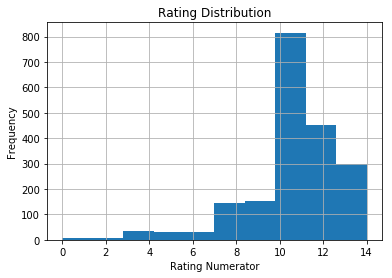

In [429]:
# create a visulization for the above data on ratings distributions
arc_clean.rating_numerator.hist()

plt.title('Rating Distribution')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency');

The average rating is 10.55, so you want to get at least an 11 if you're hoping your dog stands out among the rest of the pack.  If you got a 12, that put you in the top 37%, while a 13 would put you in the top 15%, and if you manage to snag a rating of 14, pat your dog on the back, because you can go to sleep knowing that your dog is rate higher than more than 98% of the dogs submitted. Give him a treat!

The rating system is crazy, but still very popular.  Let's see how the rest of the Twitterverse feels about the opinions of @WeRateDogs.

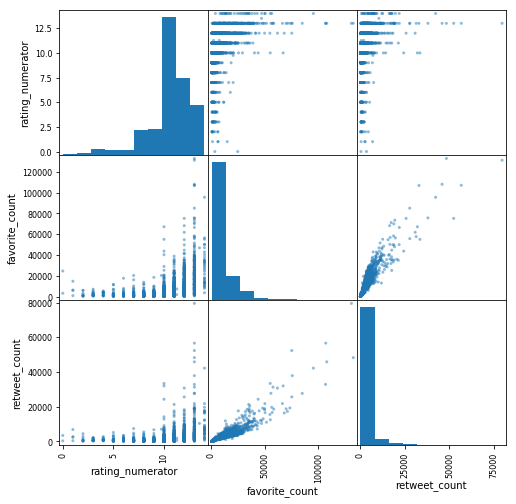

In [430]:
# look for realtionships in scatter matrix
pd.plotting.scatter_matrix(arc_clean[['rating_numerator', 'favorite_count', 'retweet_count']], figsize=(8, 8));

Interestingly, the scatter matrix above suggests that Twitter seems to agree with the rating system, since higher-rated dogs appear to get more favorites and retweets. Unsurprisingly, there is a strong positive correlation between favorites and retweets: the more a dog is retweeted, the more favorites it gets, while the more times a dog is favorited, it is more likely to be retweeted, which in turn makes it more likely to get more favorites. 

What if I want to go buy a dog for the sole purpose of scoring a high rating on @WeRateDogs? Are there certain traits I can seek out that will help my chances?  Let's look at the dog_stages to see if we can find anything out.

In [431]:
# run a multiple linear regression to see how dog_stage affects rating
import statsmodels.api as sm

arc_clean[['doggo', 'floofer', 'multiple', 'nan', 'pupper', 'puppo']] = pd.get_dummies(arc_clean.dog_stage, dummy_na=True)

arc_clean['intercept'] = 1
mod = sm.OLS(arc_clean.rating_numerator, arc_clean[['intercept', 'doggo', 'floofer', 'pupper', 'multiple', 'puppo']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.228
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.06e-07
Time:                        15:01:23   Log-Likelihood:                -4319.6
No. Observations:                1974   AIC:                             8651.
Df Residuals:                    1968   BIC:                             8685.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.6368      0.152     70.111      0.000      10.339      10.934
doggo          1.2521      0.312      4.016      0.000       0.641       1.863
floofer        1.3632      0.831      1.640      0.101      -0.266       2.993
pupper         1.3632      0.485      2.810      0.005       0.412       2.315
multiple       0.5450      0.669      0.814      0.415      -0.767       1.857
puppo         -0.1731      0.161     -1.077      0.282      -0.488       0.142
==============================================================================
Omnibus:                      550.284   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1466.987
Skew:                          -1.470   Prob(JB):                         0.00
Kurtosis:                       6.032   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this regression model, dogs with no dog_stage value were used as the baseline.  The model suggests that having a dog in one of these stages will likely increase your rating (as long as it isn't a puppo), including by a whopping +1.36 points if your dog is deemed a "floofer" or a "pupper" Having a "doggo" could improve your rating by +1.25, and having multiple stages may improve your score by half a point. The model suggests that there may be a bit less enthusiasm for "puppos," which can lower your rating by -0.17 points. So why does @WeRateDogs dislike puppos? Well, chances are that isn't actually the case, as this variable's p-value suggests that this particular coefficient is likely irrelevant. The same goes for floofers. 

So to get a high rating, I should get a floofer-pupper and I'll get a high rating, right?  Not necessarily. The R-squared value suggests a high level of covariance, and means it was very difficult to fit this model.  With an R-squared value of 0.02, we can have some fun thinking about why the rater has a subconscious bias for floofers and puppos, we are probably better off taking this with a grain of salt and embracing the randomness of the ratings.